In [ ]:
import pandas as pd
df = pd.read_csv("/content/creditcard.csv")

# Display the class distribution
print(df['Class'].value_counts())


Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow import keras


In [ ]:
legit=df[df.Class==0]
fraud=df[df.Class==1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:

legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time'], axis=1)

X = df.drop('Class', axis=1)
y = df['Class']
data = pd.concat([X, y], axis=1)
data_clean = data.dropna(subset=[y.name])

X = data_clean.drop(columns=[y.name])
y = data_clean[y.name]
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

print("Before SMOTE:")
print(y.value_counts())
print("\nAfter SMOTE:")
print(y_balanced.value_counts())


Before SMOTE:
Class
0    284315
1       492
Name: count, dtype: int64

After SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd

df = pd.read_csv("creditcard.csv")
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time'], axis=1)

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split( X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)

def build_model(activation, optimizer):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

activations = ['tanh', 'relu']
optimizers = {
    'SGD': lambda: SGD(),
    'Adam': lambda: Adam()
}

histories = {}

for activation in activations:
    for opt_name, opt_fn in optimizers.items():
        key = f"{activation}_{opt_name}"
        print(f"\n🔧 Training with activation: {activation}, optimizer: {opt_name}")
        model = build_model(activation=activation, optimizer=opt_fn())
        history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=2048, verbose=1)
        y_pred = (model.predict(X_test).flatten() > 0.5).astype("int32")
        print(f"\n Classification Report for {key}:")
        print(classification_report(y_test, y_pred))
        histories[key] = history



🔧 Training with activation: tanh, optimizer: SGD


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7688 - loss: 0.4693 - val_accuracy: 0.8774 - val_loss: 0.3337
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8939 - loss: 0.3111 - val_accuracy: 0.9217 - val_loss: 0.2590
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9263 - loss: 0.2469 - val_accuracy: 0.9338 - val_loss: 0.2169
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9350 - loss: 0.2099 - val_accuracy: 0.9371 - val_loss: 0.1916
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9381 - loss: 0.1861 - val_accuracy: 0.9392 - val_loss: 0.1755
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9398 - loss: 0.1718 - val_accuracy: 0.9402 - val_loss: 0.1647
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9408 - loss: 0.1624 - val_accuracy: 0.9413 - val_loss: 0.1570
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9427 - loss: 0.1541 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8140 - loss: 0.4018 - val_accuracy: 0.9401 - val_loss: 0.2185
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9449 - loss: 0.1919 - val_accuracy: 0.9498 - val_loss: 0.1409
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9514 - loss: 0.1320 - val_accuracy: 0.9548 - val_loss: 0.1152
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9564 - loss: 0.1103 - val_accuracy: 0.9592 - val_loss: 0.1026
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9605 - loss: 0.0997 - val_accuracy: 0.9635 - val_loss: 0.0940
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9652 - loss: 0.0917 - val_accuracy: 0.9688 - val_loss: 0.0872
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9702 - loss: 0.0846 - val_accuracy: 0.9710 - val_loss: 0.0812
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 0.0788 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7799 - loss: 0.4637 - val_accuracy: 0.9046 - val_loss: 0.2868
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9125 - loss: 0.2708 - val_accuracy: 0.9257 - val_loss: 0.2299
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9263 - loss: 0.2235 - val_accuracy: 0.9305 - val_loss: 0.2010
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9305 - loss: 0.1973 - val_accuracy: 0.9326 - val_loss: 0.1829
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9319 - loss: 0.1813 - val_accuracy: 0.9344 - val_loss: 0.1701
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9337 - loss: 0.1692 - val_accuracy: 0.9361 - val_loss: 0.1605
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9361 - loss: 0.1603 - val_accuracy: 0.9373 - val_loss: 0.1530
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9369 - loss: 0.1532 - val_accuracy: 0.9387 - val_

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7681 - loss: 0.4226 - val_accuracy: 0.9379 - val_loss: 0.1890
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9412 - loss: 0.1686 - val_accuracy: 0.9514 - val_loss: 0.1276
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9527 - loss: 0.1214 - val_accuracy: 0.9583 - val_loss: 0.1056
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9598 - loss: 0.1016 - val_accuracy: 0.9637 - val_loss: 0.0916
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9649 - loss: 0.0882 - val_accuracy: 0.9673 - val_loss: 0.0813
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9684 - loss: 0.0790 - val_accuracy: 0.9708 - val_loss: 0.0734
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9723 - loss: 0.0715 - val_accuracy: 0.9727 - val_loss: 0.0673
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9739 - loss: 0.0665 - val_accuracy: 0.9750 - val_

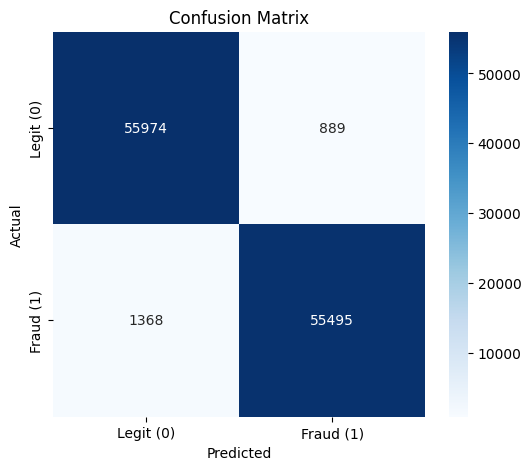

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
labels = ['Legit (0)', 'Fraud (1)']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
[0.5        0.5000044  0.50000879 ... 0.9997191  0.99974296 1.        ]
[1.         1.         1.         ... 0.31294515 0.27360498 0.        ]
[1.0817374e-28 1.2400254e-26 1.1994385e-24 ... 9.9999976e-01 9.9999988e-01
 1.0000000e+00]


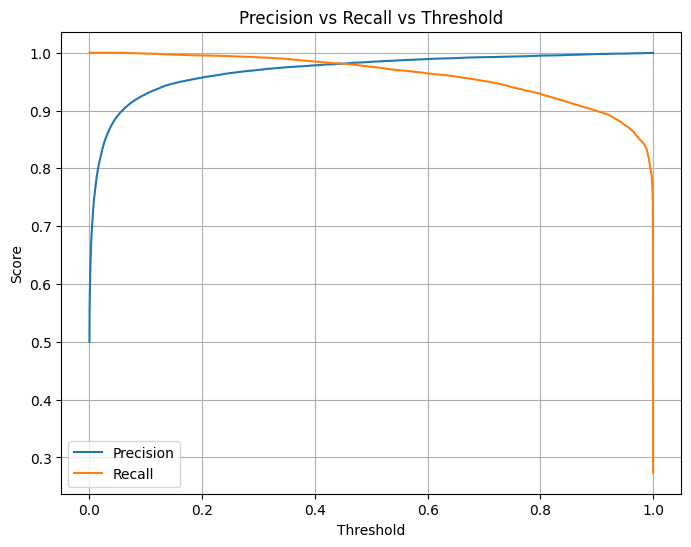

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
y_prob = model.predict(X_test).flatten()
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
print(precision)
print(recall)
print(thresholds)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_prob = model.predict(X_test).flatten()
y_pred = (y_prob > 0.3).astype("int32")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     56863
           1       0.97      0.99      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



Area Under Precision-Recall Curve (AUPRC): 0.9984


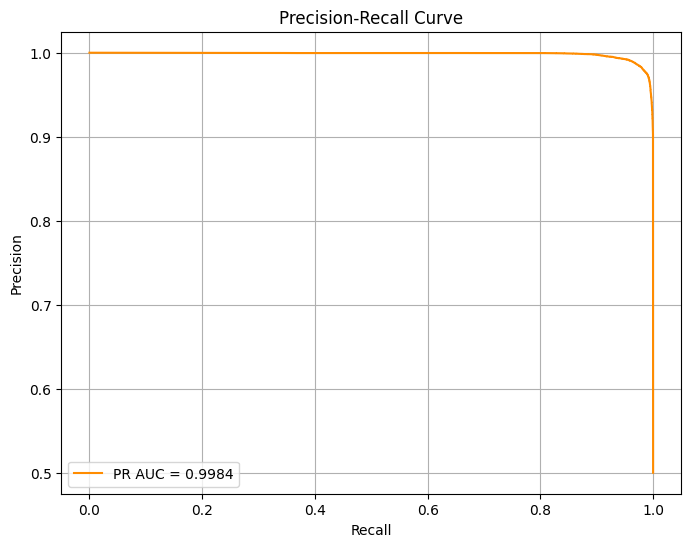

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# # Step 2: Compute precision and recall at various thresholds
# precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
auprc = auc(recall, precision)
print(f"Area Under Precision-Recall Curve (AUPRC): {auprc:.4f}")
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', label=f'PR AUC = {auprc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
